In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [4]:
train_data_dir ='/kaggle/input/urecamain/Train'
validation_data_dir = '/kaggle/input/urecamain/Vali'
test_data_dir = '/kaggle/input/urecamain/Test'

In [5]:
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Assuming two classes: fire and no fire
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
# Load the pretrained models
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Add classification layers on top of each model
model_efficientnet = Sequential([
    efficientnet_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification for fire detection
])

model_vgg16 = Sequential([
    vgg16_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_resnet50 = Sequential([
    resnet50_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
from tensorflow.keras.optimizers import Adam

# Create separate optimizer instances for each model
optimizer_efficientnet = Adam(learning_rate=0.001)
optimizer_vgg16 = Adam(learning_rate=0.001)
optimizer_resnet50 = Adam(learning_rate=0.001)

# Compile the models with their respective optimizers
loss_function = 'binary_crossentropy'
metrics = ['accuracy']

model_efficientnet.compile(optimizer=optimizer_efficientnet, loss=loss_function, metrics=metrics)
model_vgg16.compile(optimizer=optimizer_vgg16, loss=loss_function, metrics=metrics)
model_resnet50.compile(optimizer=optimizer_resnet50, loss=loss_function, metrics=metrics)

In [10]:
# Train the models
epochs = 10
model_efficientnet.fit(train_generator, epochs=epochs, validation_data=validation_generator)
model_vgg16.fit(train_generator, epochs=epochs, validation_data=validation_generator)
model_resnet50.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1714252405.928920     178 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714252406.042409     178 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


132/188 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9008 - loss: 0.2249   

W0000 00:00:1714252542.093810     179 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.9145 - loss: 0.1981

W0000 00:00:1714252577.282920     178 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.9147 - loss: 0.1978 - val_accuracy: 0.5000 - val_loss: 2.7452
Epoch 2/10


W0000 00:00:1714252595.237992     176 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step - accuracy: 0.9809 - loss: 0.0574 - val_accuracy: 0.5000 - val_loss: 1.7949
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 97s 496ms/step - accuracy: 0.9825 - loss: 0.0519 - val_accuracy: 0.5625 - val_loss: 1.4334
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 95s 485ms/step - accuracy: 0.9837 - loss: 0.0406 - val_accuracy: 0.7970 - val_loss: 1.0315
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step - accuracy: 0.9788 - loss: 0.0588 - val_accuracy: 0.9815 - val_loss: 0.0491
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 96s 492ms/step - accuracy: 0.9915 - loss: 0.0266 - val_accuracy: 0.9605 - val_loss: 0.1414
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 94s 484ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9675 - val_loss: 0.1243
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 95s 489ms/step - accuracy: 0.9925 - loss: 0.0260 - val_accuracy: 0.9840 - val_loss: 0.0437
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 96s 492ms/step - accuracy: 0.9935 - loss: 0.0187 - val

W0000 00:00:1714253541.803890     179 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.4888 - loss: 2.0625

W0000 00:00:1714253684.858673     179 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 256s 896ms/step - accuracy: 0.4889 - loss: 2.0568 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 525ms/step - accuracy: 0.5395 - loss: 0.6841 - val_accuracy: 0.4055 - val_loss: 0.7039
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 528ms/step - accuracy: 0.5897 - loss: 0.6667 - val_accuracy: 0.7235 - val_loss: 0.5804
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 518ms/step - accuracy: 0.7236 - loss: 0.5528 - val_accuracy: 0.7045 - val_loss: 0.5414
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 519ms/step - accuracy: 0.7532 - loss: 0.5071 - val_accuracy: 0.7690 - val_loss: 0.5470
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 513ms/step - accuracy: 0.7460 - loss: 0.5167 - val_accuracy: 0.7945 - val_loss: 0.4858
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 519ms/step - accuracy: 0.7796 - loss: 0.4723 - val_accuracy: 0.7975 - val_loss: 0.4136
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 516ms/step - accuracy: 0.7962 - loss: 0.45

W0000 00:00:1714254702.319512     179 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 38/188 ━━━━━━━━━━━━━━━━━━━━ 1:09 465ms/step - accuracy: 0.7714 - loss: 0.5306

W0000 00:00:1714254757.786320     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.8603 - loss: 0.3756

W0000 00:00:1714254832.844186     179 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 222s 754ms/step - accuracy: 0.8605 - loss: 0.3751 - val_accuracy: 0.5000 - val_loss: 1.3817
Epoch 2/10


W0000 00:00:1714254843.654242     177 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


188/188 ━━━━━━━━━━━━━━━━━━━━ 102s 524ms/step - accuracy: 0.9339 - loss: 0.1766 - val_accuracy: 0.5000 - val_loss: 7.3561
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 103s 527ms/step - accuracy: 0.9532 - loss: 0.1330 - val_accuracy: 0.5000 - val_loss: 5.1325
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 516ms/step - accuracy: 0.9509 - loss: 0.1326 - val_accuracy: 0.5680 - val_loss: 1.4830
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 518ms/step - accuracy: 0.9654 - loss: 0.0966 - val_accuracy: 0.9180 - val_loss: 0.2817
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 509ms/step - accuracy: 0.9607 - loss: 0.1138 - val_accuracy: 0.9515 - val_loss: 0.1787
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.9609 - loss: 0.1032 - val_accuracy: 0.9500 - val_loss: 0.1380
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 98s 504ms/step - accuracy: 0.9716 - loss: 0.0812 - val_accuracy: 0.9230 - val_loss: 0.1807
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 98s 502ms/step - accuracy: 0.9707 - loss: 0.0823 

In [12]:
# Evaluate the models on the test set
eval_efficientnet = model_efficientnet.evaluate(test_generator)
eval_vgg16 = model_vgg16.evaluate(test_generator)
eval_resnet50 = model_resnet50.evaluate(test_generator)

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9737 - loss: 0.0766
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.8401 - loss: 0.3552
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8971 - loss: 0.3107


In [13]:
# Compare the models' performance
best_accuracy = max(eval_efficientnet[1], eval_vgg16[1], eval_resnet50[1])
best_model = None

if best_accuracy == eval_efficientnet[1]:
    best_model = 'EfficientNetB0'
elif best_accuracy == eval_vgg16[1]:
    best_model = 'VGG16'
else:
    best_model = 'ResNet50'

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: EfficientNetB0
Best Accuracy: 0.972000002861023


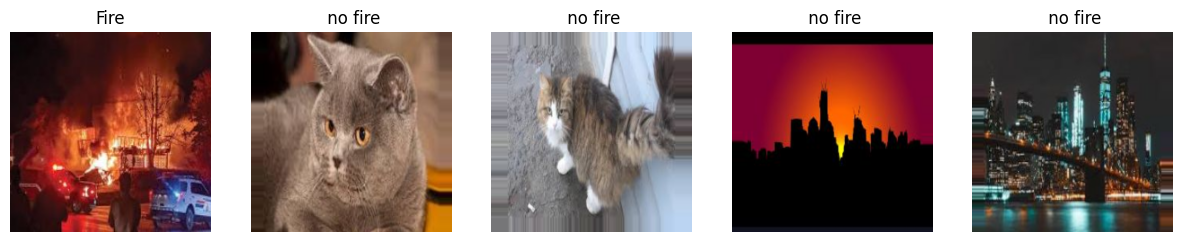

In [19]:
import matplotlib.pyplot as plt

# Function to visualize images from the dataset generator
def visualize_images(generator, num_images=5):
    # Fetch a batch of images and labels from the generator
    batch = next(generator)
    images, labels = batch

    # Map binary labels to their corresponding class names
    class_names = {0: "Fire", 1: " no fire"}

    # Visualize the images along with their labels
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])  # Convert label to int for indexing class_names
        plt.axis('off')
    plt.show()

# Visualize images from the training generator
visualize_images(train_generator)
